# AST4310 Guidelines for Notebook Assignments

This notebook contains information about how to submit assignments in Jupyter notebooks for the projects of AST4310. It is recommended that you read it carefully to ensure your hard work receives a just grade. Jupyter notebooks offer unique demonstration capabilities combining code and written justifications, but at the same time also allow a great amount of freedom to code and write. If used improperly, they can make it difficult to grade. The point of these assignments is not only to help you learn the subject matter, but also to introduce you to the writing and presenting norms followed in astrophysics, so you will be judged also on the clarity of your written justifications, on your source code, and on the appropriateness of your plots.

Most of the points in this document are suggestions or guidelines, not rules. There is only **one important rule**: the code cells must run sequentially *without any errors* (warnings are ok). The first thing the examiners will do is to run all cells of your notebook (menu "Run" > "Run All Cells"). If a code cell gives an error, scoring on that question will be seriously affected. It is better not to include incomplete code than code with errors.

## Libraries and imports

Use only registered Julia packages, and ideally only the ones used in lectures and tutorials. Think twice before using another library. If the examiners cannot install it easily, parts (or all) of your assignment will not run, and your grade can be significantly affected.

It is also a good practice to keep *all* your imports and libraries as one of the first cells in your notebook. There will be a dedicated cell for this. The "student" project notebooks already have this, so please don't change the order of these cells. You can modify them and/or add additional imports. Keeping them in one place makes your code tidy and easier to read. For example:

In [1]:
using CairoMakie
using Unitful
using NumericalIntegration
import PhysicalConstants.CODATA2018: h, k_B, c_0

## Notebook Delivery

The assignments will be handed using [devilry](https://devilry.ifi.uio.no). In addition to the notebook file, you should upload also all necessary files to run or notebook, or additional files you created along your notebook (e.g. a data file with the results of a long calculation). Loading data files or code from the internet is not allowed.

## Answering Questions: Being Concise and to the Point

Some questions will be more specific, while others are more open-ended. However, in both cases it is very important that your answer is concise and to the point. If you write an extensive amount of text that goes well beyond the question, or presents multiple possible explanations, your point is being diluted, and you are not demonstrating a good understanding of the subject. *This applies both to written questions and code!* Long blocks of code with unnecessary or unused calls will be penalised.

Here are some examples of good and bad practices:

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px; color: black;">

#### Example question

* The effective temperature of Procyon is $T_{\mathrm{eff}} = 4000~K$. Assuming it radiates isotropically as a blackbody, how much of its flux is in the infrared (consider the infrared as going from 0.7 to 20 μm)?

</div>



#### Example answer 1 (BAD)

Procyon is a star in the Canis Major constellation. It is one of the brightest stars in the night sky, having been already discovered by the Greeks. With an effective temperature of $T_{\mathrm{eff}} = 4000~K$, its spectral type is G2V and sits on the main sequence. Its colours are UBV = 111. A blackbody is a body in temperature equilibrium, where the intensity $I_\nu$ is equal to the source function $S_\nu$ and, by definition, to the Planck function $B_\nu$:

\begin{equation}
I_\nu = S_\nu = B_\nu
\end{equation}

The Planck function is given by:

\begin{equation}
   B_\nu(T) = \frac{2h\nu^3}{c^2} 
              \frac{1}{\mathrm{e}^{h\nu/kT}-1}
\end{equation}

In the customary frequency scale, with units of [W m⁻² Hz⁻¹ sr⁻¹] and by 

\begin{equation}
   B_\lambda(T) = \frac{2hc^2}{\lambda^5} 
                  \frac{1}{\mathrm{e}^{hc/\lambda kT}-1}
\end{equation}

in a wavelength scale, with units of [W m⁻² nm⁻¹ sr⁻¹]. As $\nu \to 0$, $B_\nu \to 0$, and as $\lambda \to \infty$, $B_\lambda \to \infty$. The Planck function can be divided in two regimes (two sides of the function, divided by the peak, which are the Wien (shorter wavelengths) and Rayleigh-Jeans (longer wavelength). In this exercise we are working with infrared fluxes, so we could use the Rayleigh-Jeans approximation although there is really no need to do it since it is not difficult to calculate the Planck function in python by hand, which is what we do below in the following code cell. From the infrared many wavelengths are blocked by the Earth's atmosphere due to atmospheric absorption in the atmosphere, which blocks photons coming to the surface, where we have our telescopes. Therefore, we need to use space telescopes. But in this exercise we'll assume that we can observe all that radiation:

6.62607004e-342.99792458e81.38064852e-23
0.0028877897844875860.0022185409818091598


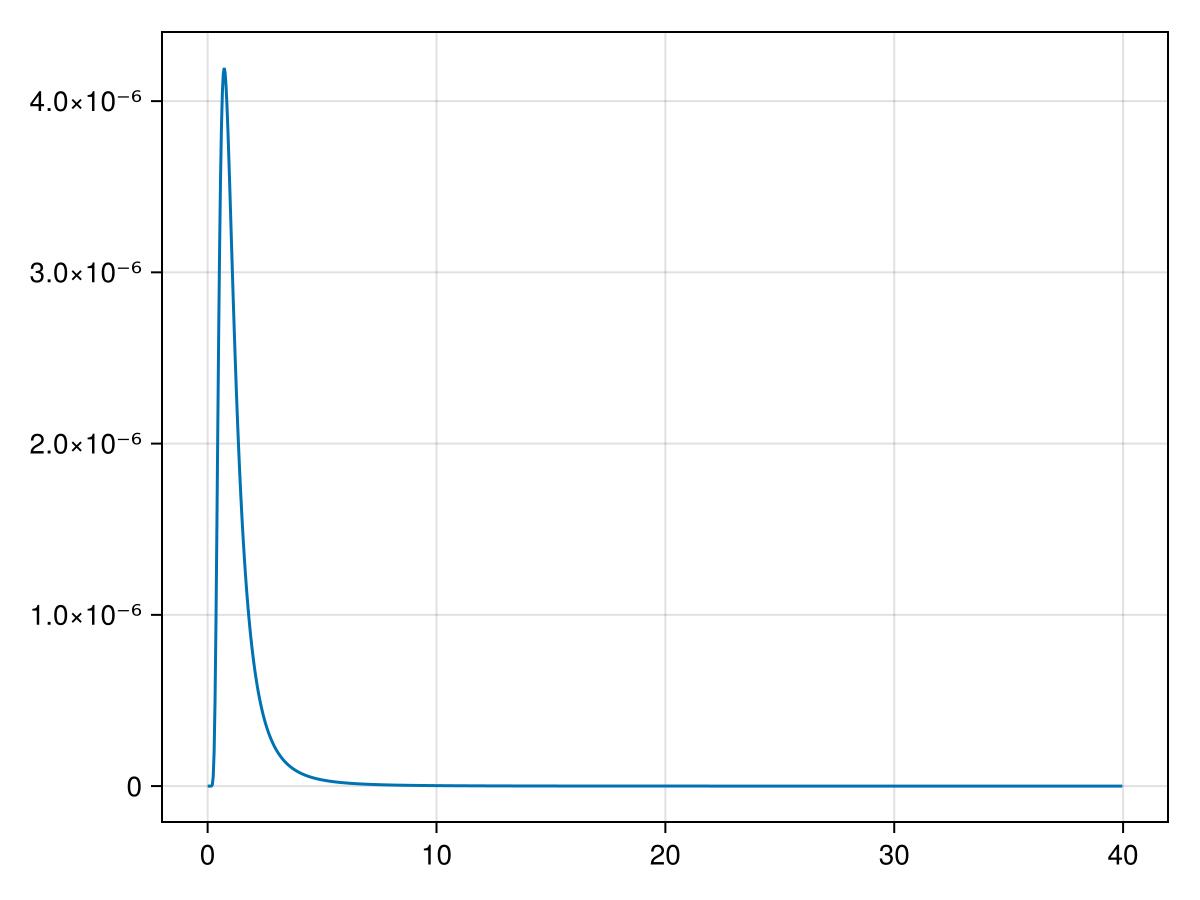

In [2]:
h1=6.62607004e-34
c=299792458.0
k=1.38064852e-23

println(h1,c,k)

function b(ll,t)
    l=ll
    a1=2*h1*(c*1e6)^2/(l*l*l*l*l)
    n=c/l
    a2=2*h1*(c*1e6)^2*n^3/(c*1e6)^2
    t2=1 ./(exp.(h1*n/k/T) .- 1)
    t1=1 ./(exp.(h1*c*1e6/k/T/l) .-1)
    
    ####
    #if name == "freq"
    #    println(a2*t2)
    #    planck=a2*t2
    #    return planck
    a1 .* t1
end

ww=range(0.1,1000)*40/1000
pl=Float64[]
T=4000

for i in 1:length(ww)
    #println(i)
    append!(pl, b(ww[i],T))
end
#Flux in infrared?
s=0
st=0
for i in 1:length(ww)
    #println(typeof(i)) #have correct b?
    st+=pl[i]/(ww[2]-ww[1])
    if ww[i] > 0.7
        if ww[i] < 20
            s+=pl[i]/(ww[2]-ww[1])
        end
    else
        continue
    end
end
println(st, s)
lines(ww, pl)

As is shown, the flux in the infrared is very small. We obtained the value 0.0022185409818091598 assuming wavelengths are given in μm. This is for the Planck function, only, so we multiply by $\pi$ which gives 0.006969752050139543.

---

#### Example Answer 2 (GOOD)

If a body radiates as a black body, its radiation (per wavelength) is given by the Planck function:

\begin{equation}
   I_\lambda \equiv B_\lambda(T) = \frac{2hc^2}{\lambda^5} 
                  \frac{1}{\mathrm{e}^{hc/\lambda kT}-1}
\end{equation}

If the body radiates isotropically, then its outgoing flux $\mathcal{F}^+_\lambda$ is given by

\begin{equation}
   \mathcal{F_\lambda^+} =  \pi B_\lambda(T)
\end{equation}

Using the function `blackbody_λ`, we can calculate the flux for a few wavelengths of interest:

In [3]:
i_units = u"kW / (m^2 * nm * sr)"

function blackbody_λ(λ::Unitful.Length, temp::Unitful.Temperature)
    radiation = 2h * c_0^2 * λ^-5 / (exp(h * c_0 / k_B / (λ * temp)) - 1)
    return radiation |> i_units
end

blackbody_λ (generic function with 1 method)

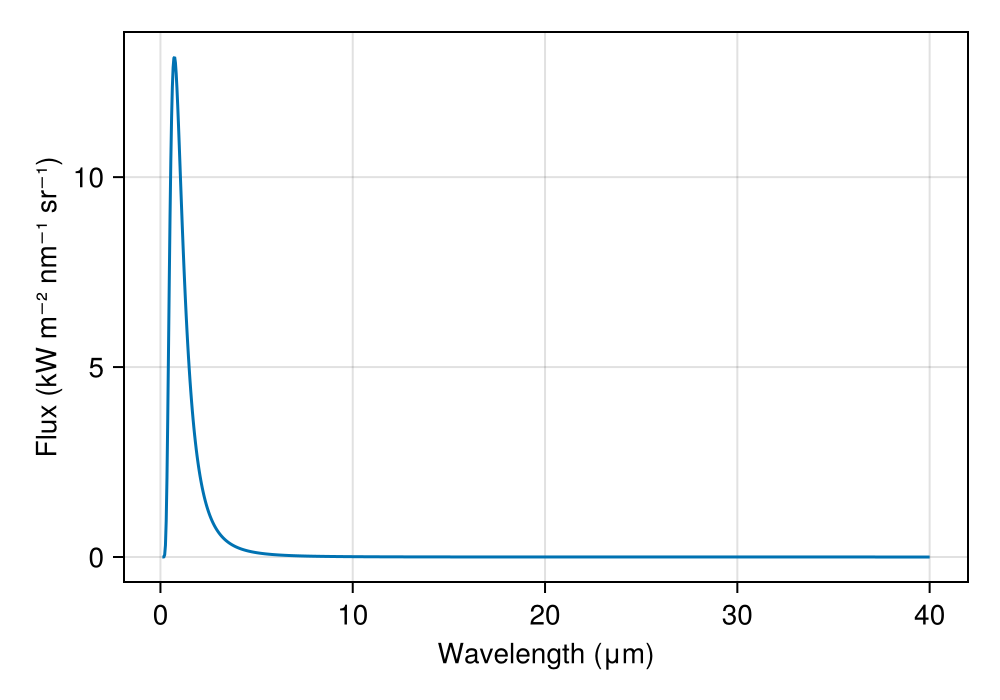

In [4]:
wavelength = range(100.0u"nm", 40u"μm", 1000) .|> u"μm"
temperature = 4000u"K"
flux = blackbody_λ.(wavelength, temperature) * π
fig = Figure(size=(500,350))
ax = Axis(fig[1,1], xlabel="Wavelength (μm)", ylabel="Flux (kW m⁻² nm⁻¹ sr⁻¹)")
lines!(ax, ustrip.(wavelength), ustrip.(flux))
fig

The flux in the infrared is simply the integrating the flux in wavelength:

In [5]:
infrared = (wavelength .> 0.7u"μm") .& (wavelength .< 20u"μm")
infrared_flux = integrate(wavelength[infrared], flux[infrared])
total_flux = integrate(wavelength, flux);

The infrared flux is therefore:

In [6]:
infrared_flux |> u"MW/m^2"

10.690247443787438 MW m⁻²

Which means that the fraction of the flux of Procyon coming in the infrared is:

In [7]:
infrared_flux / total_flux

0.7364643449669649

----

## Minimum Working Code and Relating to Text

You should write as little code as necessary to answer the questions. Commented or unused code, especially large blocks, is a distraction and should be completely removed. Every line of code you write must have a function and be useful to answer the question. There are often many ways to solve a problem computationally; some approaches may use a lot less lines of code and even be computationally more efficient. While it is welcome, the efficiency of the code will not be graded here. Similarly, you will not lose points if your approach takes more lines of code than the usual -- as long as all code lines are needed. 

The BAD example to the Example Question suffers from many problems. You will see several stray lines of code, parts that are not used, intermediate prints that only clutter the end result, and other things that are incorrect and should not be used. You also notice a certain disconnect between the code and the written answer. The code is written on a single large cell, and results from the output are copied into the text. This is bad because if your computation changes, you need to update the values in two locations, which increases the chances of you forgetting and having the text inconsistent with the code. It is better to demonstrate with smaller code cells.

It is also easier (for you and for the examiners) if the variable names are understandable and the code is logically structured. Adhering to Julia's [Blue style](https://github.com/JuliaDiff/BlueStyle) is recommended, although it will not give additional points.